# Getting The Dataset

In [ ]:
!wget "http://files.grouplens.org/datasets/movielens/ml-1m.zip"
!unzip ml-1m.zip
!ls

--2021-06-09 21:17:46--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  19.9MB/s    in 0.3s    

2021-06-09 21:17:47 (19.9 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         
ml-1m  ml-1m.zip  sample_data


# Importing The Librarires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel

# Users Data Information
- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+",
    
- Occupation is chosen from the following choices:

    0:  "other" or not specified,
    1:  "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer".

# List Of Movies With Their Respective Genre

In [ ]:
movies= pd.read_csv('ml-1m/movies.dat',sep='::',encoding='latin-1', engine='python',header= None)
movies.rename(columns={0:'Movie ID',1:'Movie',2:'Genre'},inplace=True)
movies.index.name='ser no.'
movies.head(len(movies))

,Movie ID,Movie,Genre
ser no.,,,
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama


# List Of Movies With User Id,Movie ID and Movie Ratings

In [ ]:
ratings= pd.read_csv('ml-1m/ratings.dat',sep ='::',encoding='latin-1', engine= 'python',header=None)
ratings.rename(columns={0:'User Id',1:'Movie ID',2:'Ratings',3:'Time Stamp'},inplace= True)
ratings.index.name = 'ser no.'
ratings.head(len(ratings))

,User Id,Movie ID,Ratings,Time Stamp
ser no.,,,,
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746


# List Of Users With Their Gender (F/M),Age,etc

In [ ]:
users= pd.read_csv('ml-1m/users.dat', sep ='::',encoding= 'latin-1',header =None, engine='python')
users.rename(columns={0:'User Id',1:'Gender',2:'Age',3:'Occupation',4:'Zip-code'},inplace =True)
users.index.name ='ser no.'
users.head(len(users))

,User Id,Gender,Age,Occupation,Zip-code
ser no.,,,,,
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706


# Users Data Statistics & Analysis


# Getting an idea of Users vs Gender(M=Male,F=Female)

In [ ]:
from pandas import DataFrame            
Gender=users.Gender.value_counts()  
Gender_statistics = DataFrame(Gender)
Gender_statistics

,Gender
M,4331
F,1709


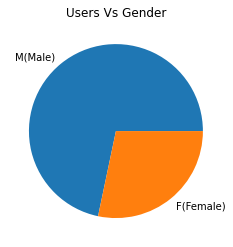

In [ ]:
%matplotlib inline
plt.pie(Gender,labels=['M(Male)','F(Female)'])
plt.title('Users Vs Gender')
plt.show()

# Getting an idea of Users vs Age groups

In [ ]:
Age_group_=users.Age.value_counts()          
Age_group_statistics =DataFrame(Age_group_)
Age_group_statistics.rename(columns={'Age':'No. of Users'},
                            index={1:"Under 18", 18:'18-24', 25:'25-34',35:'35-44', 45:'45-49', 50:'50-55' ,56:'56+'},
                            inplace=True)
Age_group_statistics.index.name = 'Age Group'
Age_group_statistics.sort_index(inplace=True)
Age_group_statistics.head(len(Age_group_statistics))

,No. of Users
Age Group,
18-24,1103
25-34,2096
35-44,1193
45-49,550
50-55,496
56+,380
Under 18,222


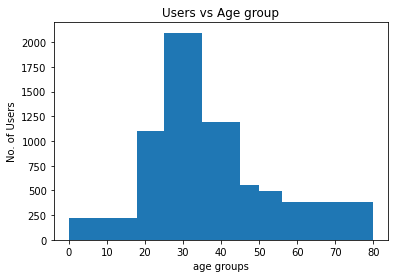

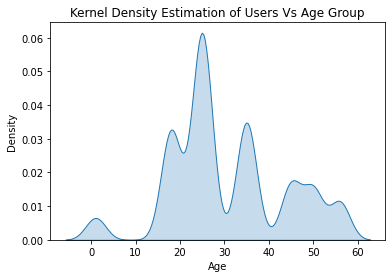

In [ ]:
%matplotlib inline
plt.hist(users.Age,bins=[0,18,25,35,45,50,56,80],histtype='bar')  
plt.xlabel('age groups')
plt.ylabel('No. of Users')
plt.title('Users vs Age group')
plt.show()

#using KDE plot to represent the Density of Users vs Age group
sns.kdeplot(users.Age,shade=True)
plt.title('Kernel Density Estimation of Users Vs Age Group')
plt.show()

# Getting an idea of Users vs Occupation

In [ ]:
Occupation= users.Occupation.value_counts()  
Occupation_statistics = DataFrame(Occupation)
Occupation_statistics.rename(columns={'Occupation':'No.of Users'},inplace=True)
Occupation_statistics.index.name='Occupation Category'
Occupation_statistics.sort_index(inplace=True)
Occupation_statistics

,No.of Users
Occupation Category,
0,711
1,528
2,267
3,173
4,759
5,112
6,236
7,679
8,17


In [ ]:
Occupation[Occupation==Occupation.max()]

Occupation Category
4    759
Name: Occupation, dtype: int64

# Conclusion - 
Majority of users belong to age group of 25-34 (2096),are males(4331) & belong to category 4("college/grad student") (759) in terms of Occupation

# Building A Recommender System Using Restricted Boltzmann Machine To Make Binary Predictions (Like/Dislike) 

# converting ratings into structure with users in lines and ratings in column

In [ ]:
ratings= np.array(ratings, dtype= 'int')
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(ratings ,test_size=0.2, random_state=1)

In [ ]:
total_no_users = int(max(max(train_set[:,0]),max(test_set[:,0])))
total_no_movies = int(max(max(train_set[:,1]),max(test_set[:,1])))
print ('total_no_users : ' + str(total_no_users))
print('total_no_movies : ' + str(total_no_movies))

total_no_users : 6040
total_no_movies : 3952


In [ ]:
def modify(data):
    list_of_lists =[]
    for i in range (1,total_no_users+1):
        movie_id =data[:,1][data[:,0]==i]
        movie_ratings =data[:,2][data[:,0]==i]
        new_rating_list= np.zeros(total_no_movies)
        new_rating_list[movie_id-1]= movie_ratings
        list_of_lists.append(list(new_rating_list))
    return list_of_lists
train_set = modify(train_set)
test_set= modify(test_set)

# converting the structure to torch tensors

In [ ]:
train_set = torch.FloatTensor(train_set)
test_set = torch.FloatTensor(test_set)

# Converting ratings to binary (1/0) values with non rated movies  as -1 rating

In [ ]:
train_set[train_set == 0] = -1
train_set[train_set == 1] = 0
train_set[train_set == 2] = 0
train_set[train_set >= 3] = 1
test_set[test_set == 0] = -1
test_set[test_set == 1] = 0
test_set[test_set == 2] = 0
test_set[test_set >= 3] = 1

# Building the architecture of Network

In [ ]:
class RestrictedBoltzmannMachine ():
  def __init__(self,n_visnodes,n_hiddnodes):
    self.W= torch.randn(n_hiddnodes,n_visnodes)
    self.bias_v= torch.randn(1,n_visnodes)
    self.bias_h= torch.randn(1,n_hiddnodes)
  def hidnode_sampling(self,x):
    wx=torch.mm(x,self.W.t())
    lin_comb= wx + self.bias_h.expand_as(wx)
    prob_sampling_h= torch.sigmoid(lin_comb)
    return prob_sampling_h , torch.bernoulli(prob_sampling_h)
  def visnode_sampling(self,y):
    wy=torch.mm(y,self.W)
    lin_comb= wy + self.bias_v.expand_as(wy)
    prob_sampling_v = torch.sigmoid(lin_comb)
    return prob_sampling_v , torch.bernoulli(prob_sampling_v)
  def training(self,vis_node_i,vis_node_k,prob_hid_i, prob_hid_k):
    self.W += (torch.mm(vis_node_i.t(),prob_hid_i) - torch.mm(vis_node_k.t(),prob_hid_k)).t()
    self.bias_v += torch.sum((vis_node_i - vis_node_k),0)
    self.bias_h += torch.sum((prob_hid_i - prob_hid_k),0)

In [ ]:
n_visnodes = total_no_movies 
n_hiddnodes = 400
batch_size = 200
rbm = RestrictedBoltzmannMachine (n_visnodes,n_hiddnodes)

# Training The Network

In [ ]:
no_of_epochs = 15
for epoch in range (1, no_of_epochs+1):
  print ('Epoch no. :' + str (epoch))
  loss_train = 0
  counter = 0.
  for user_id in range (0,total_no_users-batch_size,batch_size):
    vis_node_i = train_set[ user_id : user_id + batch_size]
    vis_node_k = train_set[ user_id : user_id + batch_size]
    for k in range (20):
      _,hid_node_k = rbm.hidnode_sampling(vis_node_k)
      _,vis_node_k = rbm.visnode_sampling(hid_node_k)
      vis_node_k [vis_node_i <0] = vis_node_i [vis_node_i<0]
    prob_hid_i,_ = rbm.hidnode_sampling(vis_node_i)
    prob_hid_k,_ = rbm.hidnode_sampling(vis_node_k)
    rbm.training(vis_node_i,vis_node_k,prob_hid_i, prob_hid_k)
    loss_train += torch.mean(torch.abs(vis_node_i[vis_node_i >=0] - vis_node_k[vis_node_i >=0]))
    counter +=1.
  print('train_loss :' + str (loss_train/counter) + 'Train_accuracy :' + str(1-(loss_train/counter)))

Epoch no. :1
train_loss :tensor(0.2288)Train_accuracy :tensor(0.7712)
Epoch no. :2
train_loss :tensor(0.2293)Train_accuracy :tensor(0.7707)
Epoch no. :3
train_loss :tensor(0.2267)Train_accuracy :tensor(0.7733)
Epoch no. :4
train_loss :tensor(0.2289)Train_accuracy :tensor(0.7711)
Epoch no. :5
train_loss :tensor(0.2289)Train_accuracy :tensor(0.7711)
Epoch no. :6
train_loss :tensor(0.2289)Train_accuracy :tensor(0.7711)
Epoch no. :7
train_loss :tensor(0.2283)Train_accuracy :tensor(0.7717)
Epoch no. :8
train_loss :tensor(0.2288)Train_accuracy :tensor(0.7712)
Epoch no. :9
train_loss :tensor(0.2280)Train_accuracy :tensor(0.7720)
Epoch no. :10
train_loss :tensor(0.2291)Train_accuracy :tensor(0.7709)
Epoch no. :11
train_loss :tensor(0.2284)Train_accuracy :tensor(0.7716)
Epoch no. :12
train_loss :tensor(0.2286)Train_accuracy :tensor(0.7714)
Epoch no. :13
train_loss :tensor(0.2292)Train_accuracy :tensor(0.7708)
Epoch no. :14
train_loss :tensor(0.2285)Train_accuracy :tensor(0.7715)
Epoch no. :15
t

# Testing the Network 

In [ ]:
loss_test = 0
counter = 0.
for user_id in range (total_no_users):
  vis_node_i = test_set[ user_id : user_id +1]
  vis_node = train_set[ user_id : user_id+1]
  if len(vis_node_i[vis_node_i >=0]) >0:
    _,hid_node = rbm.hidnode_sampling(vis_node)
    _,vis_node = rbm.visnode_sampling(hid_node)
    loss_test += torch.mean(torch.abs(vis_node_i[vis_node_i >=0] - vis_node[vis_node_i >=0]))
    counter +=1.
print('test_loss :' + str (loss_test/counter) + 'Test_accuracy :' + str(1-(loss_test/counter)))

test_loss :tensor(0.2026)Test_accuracy :tensor(0.7974)


# Comments -

The above model is a movie recommender system that predicts binary ratings(Like/Dislike) for movies not watched by an user based on earlier watched + rated movies .Restricted Boltzmann machine lies as the fundamental neural network behind the creation of this model.After importing the data and following data pre-processing (including train-test (80:20) split,etc), I converted them into a structured arraywhere the rows correspond to users, columns correspond to movies and cell(u,i) correspond to ratings (1-5) for ith movie by uth user.
This was then converted into torch tensor as PyTorch is the used library in buliding network. The train_set and test_set are of same dimension(6040 x 3952) which contains all users as well as the ratings of all movies by them respectively. (Note - The ratings of movies that aren't present in train_set might be found in test_set). Since we are oriented in prediting binary outcomes, thus I converted ratings (1,2) =0 (disliked) , (>=3) =1 (liked) & non rated movies=-1 as input should be in same structure as expected output. 
The training took place using K-Contrastive divergence algorithm via Gibbs Sampling. While testing the model input was set as train set, predicting the ratings for non-rated movies of train set which was then compared with the actual ratings of those movies present in test set. To evaluate the model mean of simple diference b/w value was taken as error.
Thus after testing I obtained accuracy as 0.7974 or 79.74% in overall.
